In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in CSV as DF
file_path = "merged_AKC.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Animal ID,Intake_Type,Intake_Condition,Breed,Color,Age_in_Years,Intactness,Sex,Age,...,Breed_update,Breed1,Breed2,AKC_group1,Size1,AKC_group2,Size2,Sorted_Color,Restricted,Multiple_Intakes
0,0,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,6.0,Altered,Male,Adult,...,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,Tan,No,0
1,1,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,7.0,Altered,Male,Adult,...,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,Tan,No,1
2,2,A006100,Stray,Normal,Spinone Italiano Mix,Yellow/White,10.0,Altered,Male,Senior,...,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,Tan,No,1
3,3,A047759,Owner Surrender,Normal,Dachshund,Tricolor,10.0,Altered,Male,Senior,...,Dachshund,Dachshund,NaN,hound,small,NaN,NaN,Tricolor,No,0
4,4,A134067,Public Assist,Injured,Shetland Sheepdog,Brown/White,16.0,Altered,Male,Senior,...,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN,Brown/White,No,0


In [13]:
df.columns

Index(['Unnamed: 0', 'Animal ID', 'Intake_Type', 'Intake_Condition', 'Breed',
       'Color', 'Age_in_Years', 'Intactness', 'Sex', 'Age', 'Breed_Type',
       'Outcome_Type', 'Length_of_Stay', 'in_Month', 'in_Year', 'Breed_update',
       'Breed1', 'Breed2', 'AKC_group1', 'Size1', 'AKC_group2', 'Size2',
       'Sorted_Color', 'Restricted', 'Multiple_Intakes'],
      dtype='object')

In [18]:
# Stats for numerical columns
df.describe()

,Unnamed: 0,Age_in_Years,Length_of_Stay,in_Month,in_Year,Multiple_Intakes
count,75982.000000,75982.000000,75982.000000,75982.000000,75982.000000,75982.000000
mean,37990.500000,2.573910,18.795570,6.607157,2017.003132,0.157235
std,21934.258414,3.005562,48.262558,3.484998,2.272193,0.364024
min,0.000000,-3.000000,1.000000,1.000000,2013.000000,0.000000
25%,18995.250000,0.583333,3.000000,4.000000,2015.000000,0.000000
50%,37990.500000,2.000000,6.000000,7.000000,2017.000000,0.000000
75%,56985.750000,3.000000,13.000000,10.000000,2019.000000,0.000000
max,75981.000000,24.000000,1914.000000,12.000000,2022.000000,1.000000


array([[<AxesSubplot:title={'center':'Age_in_Years'}>]], dtype=object)

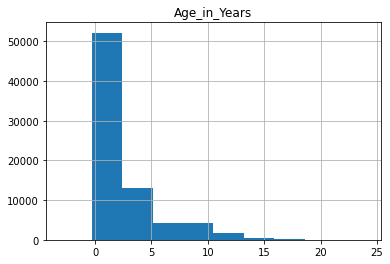

In [5]:
df.hist(column='Age_in_Years')

array([[<AxesSubplot:title={'center':'Multiple_Intakes'}>]], dtype=object)

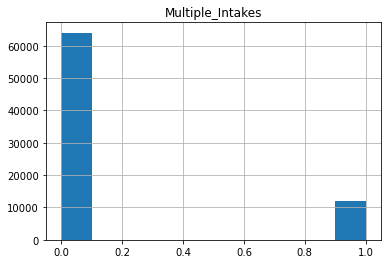

In [6]:
df.hist(column='Multiple_Intakes')

array([[<AxesSubplot:title={'center':'Length_of_Stay'}>]], dtype=object)

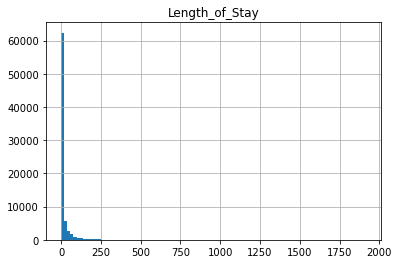

In [29]:
df.hist(column='Length_of_Stay', bins=100)

In [15]:
# Find mode of length of stay column
df.mode()['Length_of_Stay']

0        5.0
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
75977    NaN
75978    NaN
75979    NaN
75980    NaN
75981    NaN
Name: Length_of_Stay, Length: 75982, dtype: float64

Text(0.5, 1.0, 'Length of Stay per Animal')

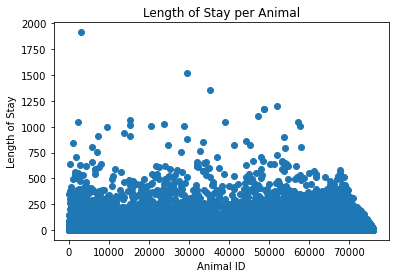

In [33]:
plt.scatter(df['Unnamed: 0'], df['Length_of_Stay'])
plt.xlabel('Animal ID')
plt.ylabel('Length of Stay')
plt.title('Length of Stay per Animal')

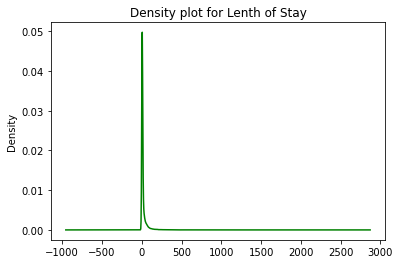

In [34]:
# Density plot for length of stay
df.Length_of_Stay.plot.density(color='green')
plt.title('Density plot for Lenth of Stay')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

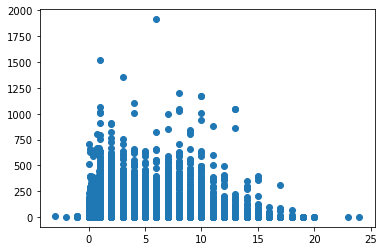

In [39]:
# Plot age and length of stay
plt.scatter(df['Age_in_Years'], df['Length_of_Stay'])
plt.show

In [40]:
df['Age'].unique()

array(['Adult', 'Senior', 'Young', nan, 'Puppy'], dtype=object)

In [50]:
# create df's for each age group
adult_df = df[df['Age']=='Adult']
senior_df = df[df['Age']=='Senior']
young_df = df[df['Age']=='Young']
puppy_df = df[df['Age']=='Puppy']
puppy_df.head()

,Unnamed: 0,Animal ID,Intake_Type,Intake_Condition,Breed,Color,Age_in_Years,Intactness,Sex,Age,...,Breed_update,Breed1,Breed2,AKC_group1,Size1,AKC_group2,Size2,Sorted_Color,Restricted,Multiple_Intakes
1203,1203,A566868,Public Assist,Normal,Pit Bull Mix,Brown/White,0.750000,Intact,Female,Puppy,...,Pit Bull,Pit Bull,NaN,pit bull,large,NaN,NaN,Brown/White,Yes,0
1204,1204,A566868,Stray,Normal,Pit Bull Mix,Brown/White,0.916667,Intact,Female,Puppy,...,Pit Bull,Pit Bull,NaN,pit bull,large,NaN,NaN,Brown/White,Yes,1
1205,1205,A566868,Stray,Normal,Pit Bull Mix,Brown/White,1.000000,Intact,Female,Puppy,...,Pit Bull,Pit Bull,NaN,pit bull,large,NaN,NaN,Brown/White,Yes,1
2152,2152,A615165,Owner Surrender,Normal,Pit Bull Mix,Black/White,1.000000,Altered,Male,Puppy,...,Pit Bull,Pit Bull,NaN,pit bull,large,NaN,NaN,Black/White,Yes,0
2215,2215,A616584,Owner Surrender,Normal,Pit Bull Mix,White/Black,1.000000,Altered,Male,Puppy,...,Pit Bull,Pit Bull,NaN,pit bull,large,NaN,NaN,Black/White,Yes,0


In [69]:
# Get the count per length of stay
adult_count = adult_df.groupby(["Length_of_Stay"]).count()["Animal ID"]
senior_count = senior_df.groupby(["Length_of_Stay"]).count()["Animal ID"]
young_count = young_df.groupby(["Length_of_Stay"]).count()["Animal ID"]
puppy_count = puppy_df.groupby(["Length_of_Stay"]).count()["Animal ID"]


<AxesSubplot:>

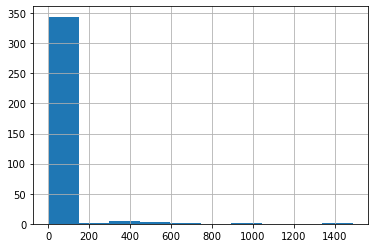

In [56]:
adult_count.hist()

<AxesSubplot:>

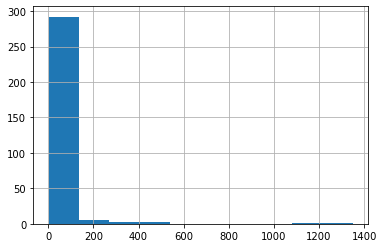

In [57]:
senior_count.hist()

<AxesSubplot:>

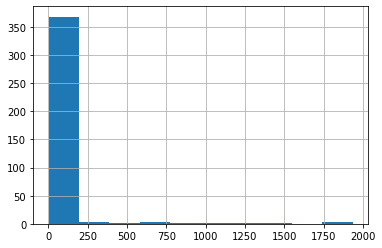

In [58]:
young_count.hist()

<AxesSubplot:>

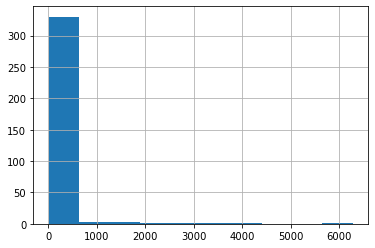

In [59]:
puppy_count.hist()